In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [ ]:
from PIL import Image
from io import BytesIO
import requests

url1 = 'https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg'
url2 = 'https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png'

original = Image.open(BytesIO(requests.get(url1).content))
tampered = Image.open(BytesIO(requests.get(url2).content))

print("Original image format:", original.format)
print("Tampered image format:", tampered.format)

print("Original image size:", original.size)
print("Tampered image size:", tampered.size)


Original image format: JPEG
Tampered image format: PNG
Original image size: (1200, 800)
Tampered image size: (282, 179)


In [ ]:
#Resize image
original = original.resize((250,160))
print(original.size)
original.save('pan_card_tampering/image/original.png')

tamperde=tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')

(250, 160)
(282, 179)


In [ ]:
# change image type png to jpg
tampered=Image.open('pan_card_tampering/image/tampered.png')
tampered.save('pan_card_tampering/image/tampered.png')

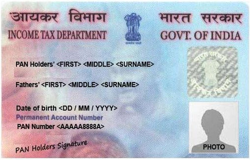

In [ ]:
original

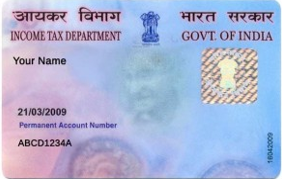

In [ ]:
tampered

In [ ]:
#load the two input images
import cv2
original=cv2.imread('pan_card_tampering/image/original.png')
tampered=cv2.imread('pan_card_tampering/image/tampered.png')

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity

# Convert PIL → numpy arrays
orig_np = np.array(original)
tampered_np = np.array(tampered)

# Resize tampered image to match original size
tampered_resized = cv2.resize(tampered_np, (orig_np.shape[1], orig_np.shape[0]))

# Convert to grayscale
original_gray = cv2.cvtColor(orig_np, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered_resized, cv2.COLOR_BGR2GRAY)

# Compute SSIM
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)

diff = (diff * 255).astype("uint8")
print("SSIM:", score)


SSIM: 0.3221113207988241


array([[254, 254, 253, ..., 253, 253, 254],
       [254, 251, 249, ..., 248, 249, 252],
       [253, 249, 252, ..., 249, 247, 251],
       ...,
       [249, 229, 217, ..., 190, 200, 238],
       [251, 248, 246, ..., 238, 241, 247],
       [253, 254, 253, ..., 255, 254, 253]], dtype=uint8)
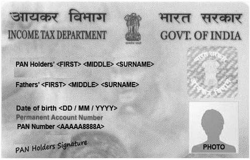

In [ ]:
original_gray

array([[254, 254, 254, ..., 252, 252, 254],
       [254, 254, 254, ..., 249, 251, 253],
       [254, 253, 250, ..., 236, 251, 252],
       ...,
       [253, 254, 248, ..., 233, 249, 252],
       [254, 253, 252, ..., 246, 252, 253],
       [255, 254, 254, ..., 252, 252, 250]], dtype=uint8)
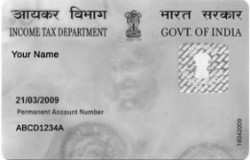

In [ ]:
tampered_gray

In [ ]:
# Calculating threshold and contours
import imutils
thresh = cv2.threshold(diff,0 , 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts=cv2.findContours(thresh.copy() , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
#loop over contours
for c in cnts:
  #applying contours on image
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original , (x,y) , (x+w , y+h) , (0,0,255),2)
  cv2.rectangle(tampered , (x,y) , (x+w , y+h) , (0,0,255),2)

Original Format Image


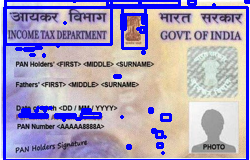

In [ ]:
#Dsiplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered image


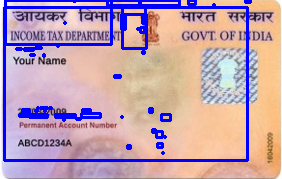

In [ ]:
#Display tampered image with contour
print('Tampered image')
Image.fromarray(tampered)

Different Image


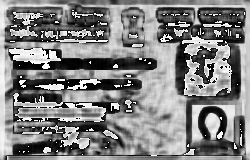

In [ ]:
#Display difference image with black
print('Different Image')
Image.fromarray(diff)
#Black portion showing the difference from the original one


Threshold Image 


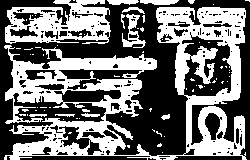

In [ ]:
#Display  threshold image with white
print('Threshold Image ')
Image.fromarray(thresh)
#White portion showing the difference from the original one

In [ ]:
# As our SSIM score is ~31.2 that's why we can say that the uploaded pan card document is tampered
